# Polynomial regression
Polynomial regression will allow us to build a nonlinear model by adopting and fitting a polynomial.

We have seen how to solve a linear problem. But in everyday life, we meet a lot of other models that are not linear, which are made of curves, sinusoids etc...

If we observe the contamination rate of a pandemic, the line will not be linear but will probably look like an exponential curve.

For example, if you apply a linear model on these data :




![polynomial](./assets/polynom_1.JPG)


We can see that the bias of our predictions will be important.   
We cannot say that our model is effective.

But the following model already inspires me much more confidence.

![](./assets/poly_2.JPG)

The polynomial can have several degrees, the more degrees it has, the more it will be able to solve complex problems.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/16/Lsf.gif" />
Source <a href=https://upload.wikimedia.org/wikipedia/commons/1/16/Lsf.gif >Wikipedia</a>

Although polynomial models allow us to model relationships of non-linear shapes, they belong to the family of linear models. In the term "linear model", the adjective "linear" refers to the parameters of the model and the fact that their effects are added together. This is indeed the case here. Moreover, linear regression is a polynomial of degree 1. 

## Variables studied

In [35]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd

First of all, we will load our dataset. This is a fake dataset for the example.

In [36]:
df = pd.read_csv("./data/poly.csv")
df.head()

,x,y
0,0.302472,-4.306789
1,-1.270485,-56.483346
2,1.532779,211.100819
3,-1.602058,-39.496543
4,1.139401,168.565071


In [37]:
df.shape

(200, 2)

As you can see we now have 200 rows, 1 feature and 1 target.

**Exercise :** Create the `X` and `y` variables and define which column will be the target and which column will be the feature. 
They must be of type `numpy.ndarray`. Our variable `X` therefore has one dimension.

In [38]:
y_target = np.array(df.y)
X_feature = np.array(df.x)
print(y_target, X_feature)
print(type(y_target))

[ -4.30678861 -56.48334608 211.10081893 -39.49654256 168.56507095
  14.35851876 103.66383219 148.11103202  52.03705444  22.43236382
 -60.43568375 -30.09264465 -17.12279253 210.37773438 -18.62028339
  -1.34321175 -51.84425091 -29.11117649 -29.2250982  -23.65931199
  64.48199882 151.49354013 124.30344468  -6.48740968 -19.70954022
 265.33124267  98.46294359 -22.18275569 -53.01080446 385.43926615
  -8.68811777 -65.33872814 211.4620385   88.0987219  -44.70055115
   5.48104324 160.66041499 373.81351411 176.06522377 -42.4019881
 -16.15014303 -39.14533088 -47.19266986 -11.18679142  59.1510128
  -4.85565264 -67.14225051   2.17723227 148.19177069 -18.64445881
 118.20812014 -34.25141432 -17.70096589  60.79833755 -51.06065874
 -31.23183776 -10.32738658 -49.35067592  19.48773399 301.1529924
 -56.98365492  88.07867493  -4.11377192 366.41179301 -39.27981588
  -1.14949459 -72.7267602  114.16637069 384.7959682   47.87479499
  -9.22640883 -12.9032251   -7.93081291 257.22908606 -40.23586163
  -7.6632983 

In [39]:
print(y_target.shape)

(200,)


### Relationship between variables

**Exercise:** Use matplotlib (or other) to display the dataset as a scatter plot.

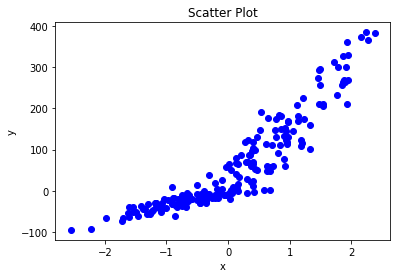

In [40]:
ax = plt.gca()
#print(X_features)
plt.scatter(X_feature, y_target, color="blue")
plt.title("Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Exercise :** Show correlation coefficients.

In [41]:
import scipy as sc
print(sc.stats.spearmanr(X_feature, y_target))
print(sc.stats.pearsonr(X_feature, y_target))

SpearmanrResult(correlation=0.9558598964974125, pvalue=2.840519351720731e-107)
(0.9112287953566548, 3.3257044493899896e-78)


As we can see, the coefficient of correlation remains important even if the dataset is not perfectly linear.

### Split the dataset


You now know the process!

**Exercise :** Import `train_test_split` from sklearn and split the dataset and create the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [42]:
from sklearn. model_selection import train_test_split

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=42)

print(y_test)
print(X_test)

[ 51.2657353   -1.34321175  -8.68811777 129.67939068 -26.37382199
 274.12642887  47.87479499  48.76543061 -43.02491015  -4.85565264
 -72.7267602   28.99705685  64.511962   101.71274988 173.85524086
 118.68152939 -10.32738658 -38.61645944 -21.19954151 384.7959682
 150.01787165 -51.84425091 -25.83439725 292.46295227  -1.14949459
 -56.98365492  61.36531427 114.16637069  -3.51995519 -17.05122553
  22.43236382 -29.2250982  -31.23183776  -7.6632983  -22.19891341
 109.95600634   9.76488813 -10.49300269 -33.44717793 -38.79141726]
[ 0.0519454  -0.38732682 -0.43782004  0.77179055 -0.74216502  1.45427351
  0.67229476  0.63503144 -1.04855297 -0.14963454 -1.7262826   0.3130677
  0.01050002  1.33652795  0.77749036  0.95008842 -0.63584608 -1.53624369
 -0.67246045  2.38314477  0.8644362  -1.5447711  -0.74475482  1.46935877
  0.04575852 -1.31590741  0.92085882  0.94942081 -0.15135721 -0.17154633
  0.37816252 -0.4555325  -1.29285691 -0.49803245 -0.97727788  1.18802979
  0.08755124 -0.03928282 -0.8877857

##  Load and fit the model (with Sklearn)

This time there is a little change. 
We have a single feature in our dataset. The polynomial model is a special case of multiple regression. So we need several features to be able to apply polynomial regression. And these features, we'll have to add them ourselves. By the way, this way of doing things has a name: feature engineering.


Let's imagine that we want to have a 2-degree polynomial regression. 
So we will need to add a feature. 
This feature is simply an exponent of $x$.  

$[ x, x^2]$

So $x^2$ is the new feature.

If you want a 3-degree polynomial model, you will have to add 2 features in this case.

$[x, x^2, x^3]$

To do this, we will need to create a pipeline. 
A pipeline is a processing chain that will execute a set of functions and pass arguments between them.


First of all, we need to define the number of degrees.   
**Exercise:** Create a `degree` variable with 1 as value. (We will change this value later)

In [43]:
degree = 1

**Exercise :** Create a pipeline with sklearn.This pipeline must contain the `PolynomialFeatures` and `LinearRegression` classes. Don't forget to set the number of degrees for the `PolynomialFeatures`


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# define the pipeline
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('preprocessor', PolynomialFeatures(degree=degree, include_bias=False)),
    ('estimator', Ridge(alpha=1))
])



In [45]:

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
print(X_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


**Exercise :** Fit your model.

In [46]:
# fit the pipeline
pipe.fit(X_train, y_train)

# generate the model predictions
y_pred_train_pipe = pipe.predict(X_train)

**Exercise :** Use a scatter plot and display your predictions on `X_test`.

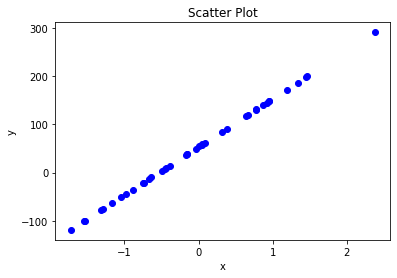

In [49]:
X_test = X_test.reshape(-1, 1)
y_pred_test_pipe = pipe.predict(X_test)

ax = plt.gca()
#print(X_features)
plt.scatter(X_test, y_pred_test_pipe, color="blue")
plt.title("Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

If you see a straight line it is because we have set the number of degrees to one. This confirms that the linear regression is indeed a polynomial model of degree 1.

**Exercise :** Change the number of degrees and train your model again. You must try to fit the curve as well as possible while limiting the number of degrees, to save some resources from your machine.

(160, 1)


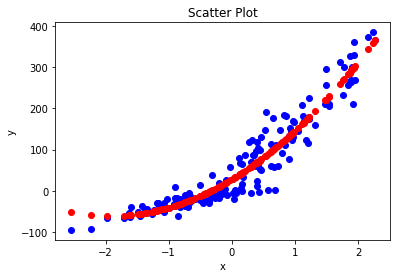

In [58]:
degree = 2
# define the pipeline
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('preprocessor', PolynomialFeatures(degree=degree, include_bias=False)),
    ('estimator', Ridge(alpha=1))
])


# fit the pipeline
pipe.fit(X_train, y_train)

# generate the model predictions
y_pred_train_pipe = pipe.predict(X_train)

print(X_train.shape)

ax = plt.gca()
#print(X_features)
plt.scatter(X_train, y_train, color="blue")
plt.scatter(X_train, y_pred_train_pipe, color='red')

plt.title("Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## From scratch.

Again a few changes. This time we'll just have to add new features manually. 

### Transform to matrix

$$
\\ Y = X \cdot \theta \\
$$

The $Y$ vector is the same too

$$Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
$$ 


The theta vector will have as many lines as there are parameters +1 (for the constant). 
$$ \theta =
\begin{bmatrix}
a\\
b\\
c\\
... \\
\end{bmatrix}
$$

The $X$ initially looks like this : 

$$ X =
\begin{bmatrix}
x^{(1)}\\
x^{(2)}\\
x^{(3)}\\
x^{(m)}\\
\end{bmatrix}
$$

If we want to add a degree to the polynomial, it adds a feature to our $X$. And this feature will contain $x^2$.

Example of polynomial of degree 2 :

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)2}_2\\
x^{(2)}_1, x^{(2)2}_2\\
x^{(3)}_1, x^{(3)2}_2\\
\dots, \dots\\
x^{(m)}_1,x^{(m)k}_2\\
\end{bmatrix}
$$

Example of polynomial of degree 3: (In this case the third feature will be of power 3.)

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)2}_2, x^{(1)3}_3\\
x^{(2)}_1, x^{(2)2}_2, x^{(2)3}_3\\
x^{(3)}_1, x^{(3)2}_2, x^{(3)3}_3\\
\dots, \dots,\dots \\
x^{(m)}_1,x^{(m)2}_2, x^{(m)3}_3\\
\end{bmatrix}
$$

And so on and so forth. Of course, don't forget at the end to add a feature with only 1s.

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)2}_2, ..., x^{(m)k}_{n}, 1\\
x^{(2)}_1, x^{(2)2}_2, ..., x^{(m)k}_{n}, 1\\
x^{(3)}_1, x^{(3)2}_2, ..., x^{(m)k}_{n}, 1\\
x^{(m)}_1,x^{(m)k}_2, ..., x^{(m)k}_{n}, 1\\
\end{bmatrix}
$$

**Exercise :** Create a matrix `X` for a 3-degree polynomial $[x, x^2, x^3, 1]$

In [76]:
X1 = X_feature
X1 = X1.reshape(-1, 1)

X2 = np.multiply(X1,X1)
X3 = np.multiply(X1,X2)
X4 = np.ones(200)
X4 = X4.reshape(-1, 1)

X = np.hstack((X1, X2,X3,X4))

print(X.shape)
print(X1[0])
print(X2[0])
print(X3[0])

(200, 4)
[0.3024719]
[0.09148925]
[0.02767293]


**Exercise :** Initialize the random `theta` vector, with 4 elements (because `X` has four columns)

In [78]:
theta = np.random.random(4)
print(theta.shape)

(4,)


**Exercise :** Create the `model`. It is always the same $$Y = X \cdot \theta $$.

In [79]:
model = lambda X, theta: X.dot(theta)

**Exercise :** Create a `MSE` function. It is always the same too.

In [80]:
def MSE(X,y,theta):
    m=len(X)
    mse=1/(2*m) * sum((np.dot(X , theta) - y)**2)
    return mse

**Exercise :** Create a `grad` function. Again, it is always the same.

In [81]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

**Exercise :** 
Again...
1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate` and `n_iterations`.
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the histogram of the model learning process.
3. Create a loop that iterates up to `n_iterations`.
4. In the loop, update `theta` with the formula of the gradient descent (the example above).
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`.
6. Return `theta` and `cost_history`

In [82]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        print(i)
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = MSE(X,y,theta) # values of MSE
        
         #cost_history.append(computeCost(X, y, theta))
    return theta, cost_history

### Train your model 

**Exercise :** Create variables `n_iterations` and `learning_rate`.

In [83]:
n_iterations = 1000
learning_rate = 0.01 #alpha


**Exercise :** Create variables `theta_final`, `cost_history` and call `gradient_descent()`.

In [84]:
theta_final, cost_history = gradient_descent(X, y_target, theta, learning_rate, n_iterations)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

**Exercise :** Create a `predictions` variable that contains `model(X, theta_final)`.


In [85]:
predictions=model(X, theta_final)

**Exercise :** Display your `predictions` and the true values of the dataset

In [89]:
print(predictions.shape)
print(y_train.shape)

(200,)
(160, 1)


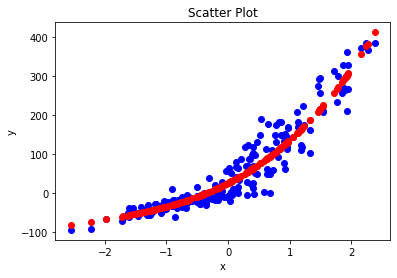

In [94]:
ax = plt.gca()
#print(X_features)
plt.scatter(X_feature,y_target, color="blue")
plt.scatter(X_feature, predictions, color='red')

plt.title("Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

It says it looks like this.

<img src="./assets/poly3.JPG" />

**Exercise :** Plot `cost_history`.

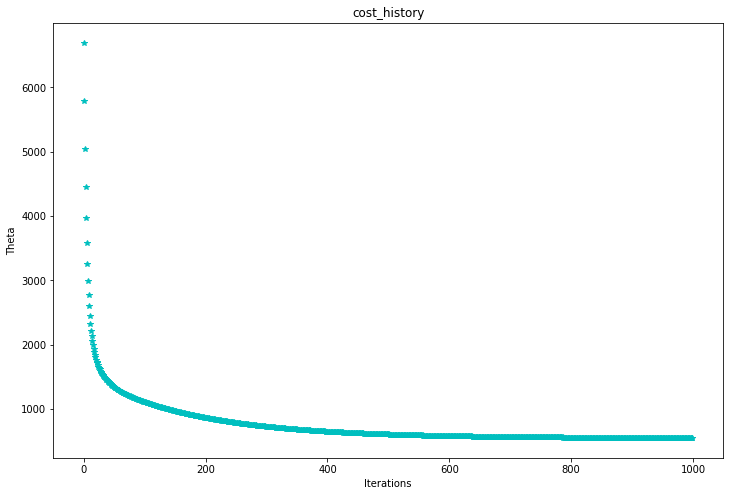

In [96]:
fig,ax = plt.subplots(figsize=(12,8))
plt.title('cost_history')
plt.ylabel('Theta')
plt.xlabel('Iterations')
_=ax.plot(range(n_iterations),cost_history,'c*')

In [97]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [98]:
coef_determination(y_target, predictions)

0.9109764313291763

**Exercise :** Try to improve your model by adding a degree to your polynomial model.

Good, you must feel like this now: 

![](https://media.giphy.com/media/DHqth0hVQoIzS/giphy.gif)

## Where to go next ? 
Linear models might look simple but they can get very complicated.
You might look into **Ridge Regression** or **Lasso Regression** if you want to further deepen your knowledge.

- [Statquest - Regularization explained (Lasso & Ridge)](https://youtu.be/Q81RR3yKn30)